In [1]:
# Loan Approval Prediction Project
# Author: Sucheta Nandy
# Date: 27-August-2025

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [3]:
# 1. Load dataset
# Replace 'loan_data.csv' with your dataset path
data = pd.read_csv('loan_data.csv')

# Preview data
print(data.head())
print(data.info())

  Loan_ID  Gender Married Dependents Education Self_Employed  ApplicantIncome  \
0  LP1000    Male     Yes          0  Graduate            No            19854   
1  LP1001  Female     Yes          0  Graduate            No             7642   
2  LP1002    Male     Yes          2  Graduate            No            10594   
3  LP1003    Male      No          1  Graduate            No             1864   
4  LP1004    Male     Yes          2  Graduate            No            17188   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0               9689         169               360               1   
1               3171         266               360               1   
2               1567         105               360               1   
3               1151         415               360               1   
4               7619         553               360               1   

  Property_Area Loan_Status  
0         Urban           Y  
1     Semiurban           Y  
2 

In [4]:
# 2. Data Preprocessing
# Separate target variable
target = 'Loan_Status'
X = data.drop(columns=[target])
y = data[target]

In [5]:
# Encode target variable if necessary
le_target = LabelEncoder()
y = le_target.fit_transform(y)  # 'Y' -> 1, 'N' -> 0

In [6]:
# Handling missing values
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Impute numerical features with median
imputer_num = SimpleImputer(strategy='median')
X[num_features] = imputer_num.fit_transform(X[num_features])

# Impute categorical features with mode
imputer_cat = SimpleImputer(strategy='most_frequent')
X[cat_features] = imputer_cat.fit_transform(X[cat_features])

In [7]:
# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

In [8]:
# Feature Scaling (optional for tree-based models but good for logistic regression)
scaler = StandardScaler()
X[num_features] = scaler.fit_transform(X[num_features])

In [9]:
# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
# 4. Model Training
# Define individual classifiers
log_reg = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)

# Ensemble Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('lr', log_reg), ('rf', rf_clf), ('gb', gb_clf), ('dt', dt_clf)],
    voting='soft'
)

# Fit ensemble model
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42))],
                 voting='soft')

In [11]:
# 5. Model Evaluation
y_pred = voting_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.65      0.77        26
           1       0.89      0.99      0.94        74

    accuracy                           0.90       100
   macro avg       0.92      0.82      0.85       100
weighted avg       0.90      0.90      0.89       100


Confusion Matrix:
 [[17  9]
 [ 1 73]]


In [12]:
# 6. Feature Importance (for tree-based models)
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_clf.fit(X_train, y_train).feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:\n", feature_importances)


Feature Importances:
                Feature  Importance
4       Credit_History    0.281184
0      ApplicantIncome    0.097543
2           LoanAmount    0.081822
1    CoapplicantIncome    0.069134
3     Loan_Amount_Term    0.025523
..                 ...         ...
8       Loan_ID_LP1004    0.000000
501     Loan_ID_LP1497    0.000000
491     Loan_ID_LP1487    0.000000
16      Loan_ID_LP1012    0.000000
496     Loan_ID_LP1492    0.000000

[513 rows x 2 columns]


In [13]:
# 7. Save Model for future use
import joblib
joblib.dump(voting_clf, 'loan_approval_model.pkl')
print("\nModel saved as 'loan_approval_model.pkl'")


Model saved as 'loan_approval_model.pkl'


A more visual Version

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            500 non-null    object
 1   Gender             500 non-null    object
 2   Married            500 non-null    object
 3   Dependents         500 non-null    object
 4   Education          500 non-null    object
 5   Self_Employed      500 non-null    object
 6   ApplicantIncome    500 non-null    int64 
 7   CoapplicantIncome  500 non-null    int64 
 8   LoanAmount         500 non-null    int64 
 9   Loan_Amount_Term   500 non-null    int64 
 10  Credit_History     500 non-null    int64 
 11  Property_Area      500 non-null    object
 12  Loan_Status        500 non-null    object
dtypes: int64(5), object(8)
memory usage: 50.9+ KB
None
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       500.000000          500.00000  500.000000      

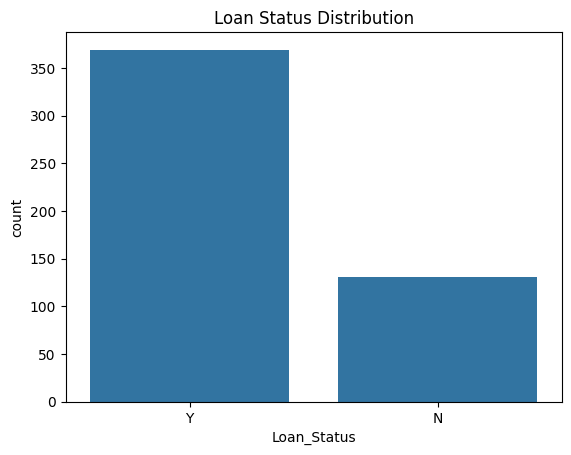

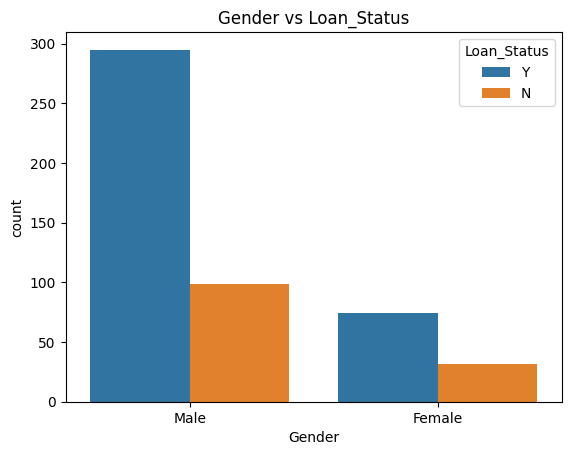

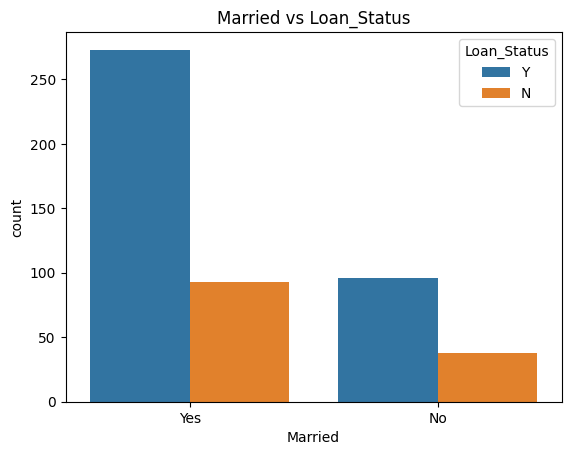

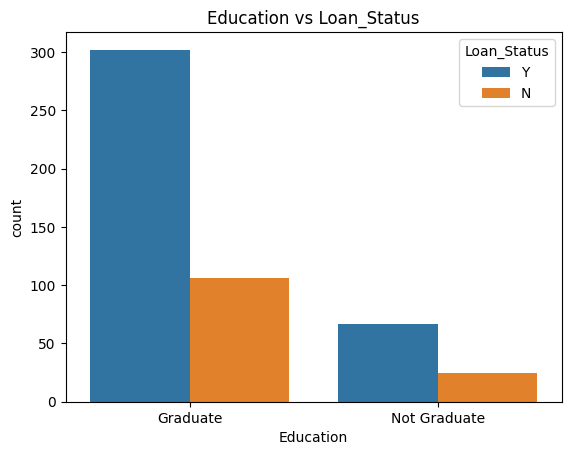

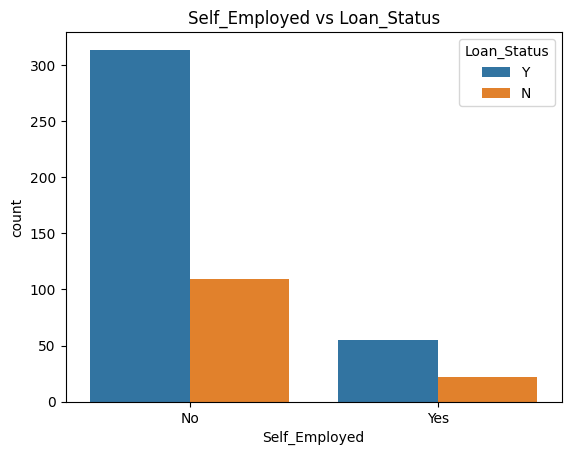

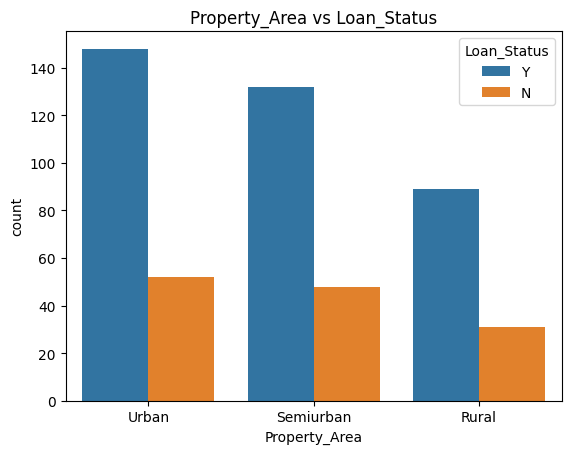

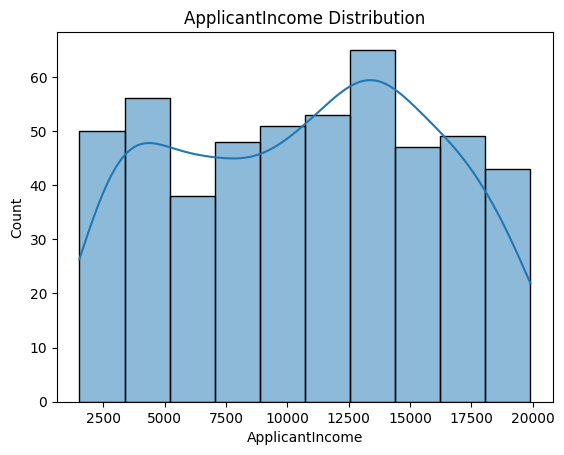

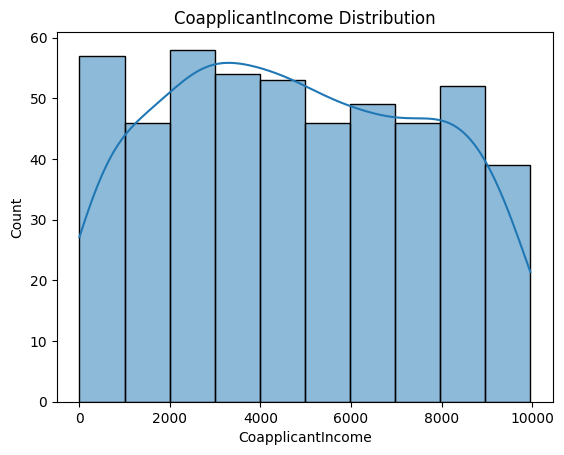

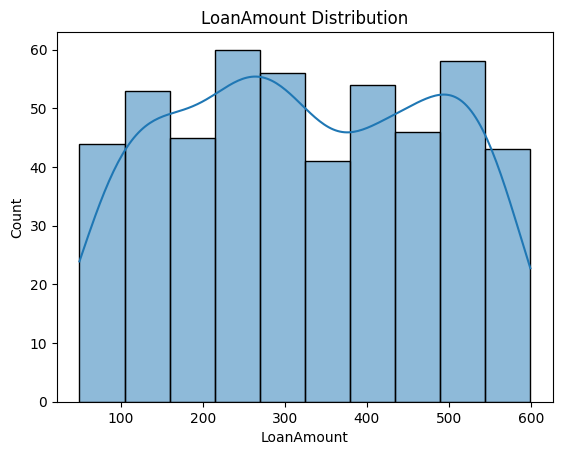

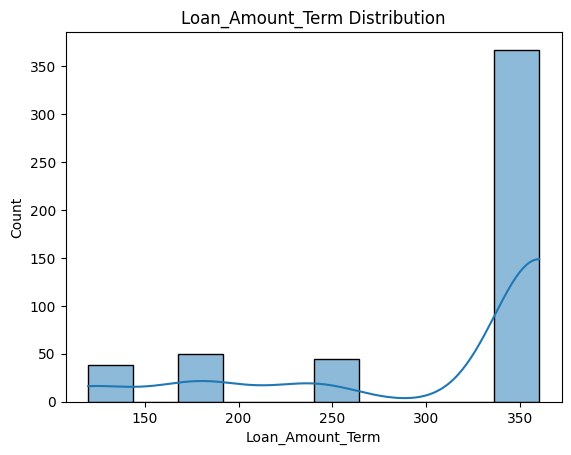

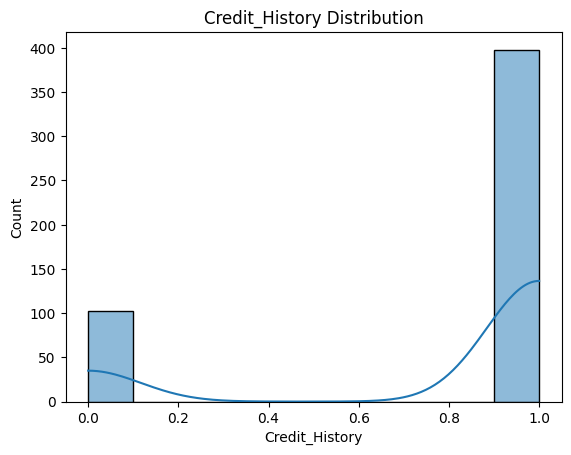

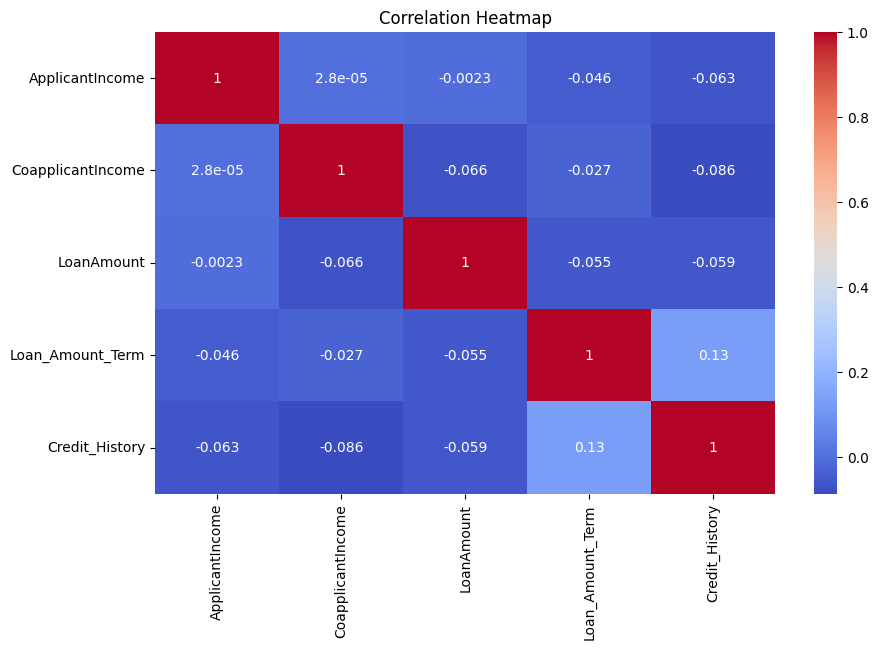

Accuracy: 0.89

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.65      0.76        26
           1       0.89      0.97      0.93        74

    accuracy                           0.89       100
   macro avg       0.89      0.81      0.84       100
weighted avg       0.89      0.89      0.88       100



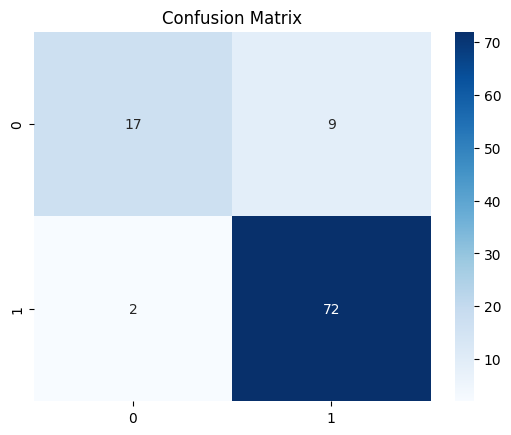

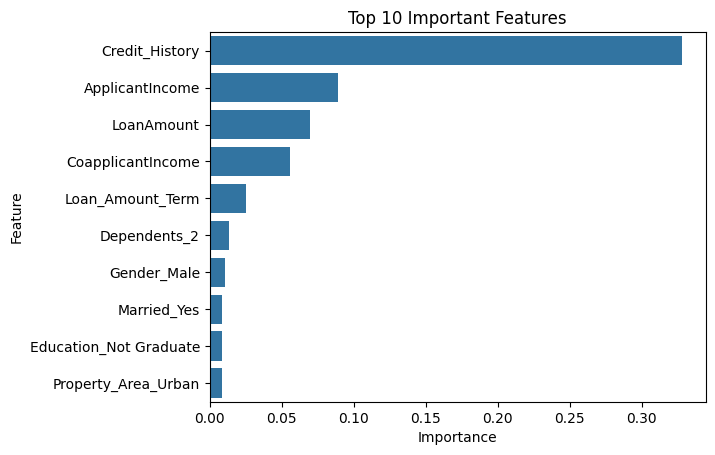

In [16]:
# Loan Approval Prediction - EDA and Model Building
# Author: Sucheta Nandy

# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Display plots inline
%matplotlib inline

# 2️⃣ Load Dataset
data = pd.read_csv('loan_data.csv')
data.head()

# 3️⃣ Exploratory Data Analysis (EDA)
print(data.info())
print(data.describe())
print(data.isnull().sum())

# Visualize target variable
sns.countplot(x='Loan_Status', data=data)
plt.title("Loan Status Distribution")
plt.show()

# Visualize categorical features
cat_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
for feature in cat_features:
    sns.countplot(x=feature, hue='Loan_Status', data=data)
    plt.title(f"{feature} vs Loan_Status")
    plt.show()

# Visualize numeric features
num_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for feature in num_features:
    sns.histplot(data[feature].dropna(), kde=True)
    plt.title(f"{feature} Distribution")
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data[num_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 4️⃣ Data Preprocessing
target = 'Loan_Status'
X = data.drop(columns=[target])
y = LabelEncoder().fit_transform(data[target])  # Y->1, N->0

num_features = X.select_dtypes(include=['int64','float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Impute missing values
X[num_features] = SimpleImputer(strategy='median').fit_transform(X[num_features])
X[cat_features] = SimpleImputer(strategy='most_frequent').fit_transform(X[cat_features])

# One-hot encode categorical
X = pd.get_dummies(X, drop_first=True)

# Scale numeric features
X[num_features] = StandardScaler().fit_transform(X[num_features])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5️⃣ Model Training with Hyperparameter Tuning
# RandomForest
rf_params = {'n_estimators':[100,200], 'max_depth':[None,5,10], 'min_samples_split':[2,5]}
rf_clf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
rf_clf.fit(X_train, y_train)

# GradientBoosting
gb_params = {'n_estimators':[100,200], 'learning_rate':[0.05,0.1], 'max_depth':[3,5]}
gb_clf = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=5, scoring='accuracy')
gb_clf.fit(X_train, y_train)

# Logistic Regression & Decision Tree
log_reg = LogisticRegression(max_iter=1000, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
log_reg.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)

# Ensemble Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('lr', log_reg), ('rf', rf_clf.best_estimator_),
                ('gb', gb_clf.best_estimator_), ('dt', dt_clf)],
    voting='soft'
)
voting_clf.fit(X_train, y_train)

# 6️⃣ Model Evaluation
y_pred = voting_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_clf.best_estimator_.feature_importances_
}).sort_values(by='Importance', ascending=False)
feature_importances.head(10)

# Plot top 10 features
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title("Top 10 Important Features")
plt.show()
